In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [9]:
import requests

url = 'https://github.com/rikhuijzer/heart-disease-dataset/blob/main/heart-disease-dataset.csv?raw=true'
df = pd.read_csv(url, index_col=0)
print(df.head())

      sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
age                                                                          
40.0  1.0              2.0         140.0        289.0                  0.0   
49.0  0.0              3.0         160.0        180.0                  0.0   
37.0  1.0              2.0         130.0        283.0                  0.0   
48.0  0.0              4.0         138.0        214.0                  0.0   
54.0  1.0              3.0         150.0        195.0                  0.0   

      resting_ecg  max_heart_rate  exercise_angina  oldpeak  st_slope  target  
age                                                                            
40.0          0.0           172.0              0.0      0.0       1.0     0.0  
49.0          0.0           156.0              0.0      1.0       2.0     1.0  
37.0          1.0            98.0              0.0      0.0       1.0     0.0  
48.0          0.0           108.0              1.0   

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 40.0 to 38.0
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1190 non-null   float64
 1   chest_pain_type      1190 non-null   float64
 2   resting_bp_s         1190 non-null   float64
 3   cholesterol          1190 non-null   float64
 4   fasting_blood_sugar  1190 non-null   float64
 5   resting_ecg          1190 non-null   float64
 6   max_heart_rate       1190 non-null   float64
 7   exercise_angina      1190 non-null   float64
 8   oldpeak              1190 non-null   float64
 9   st_slope             1190 non-null   float64
 10  target               1190 non-null   float64
dtypes: float64(11)
memory usage: 111.6 KB


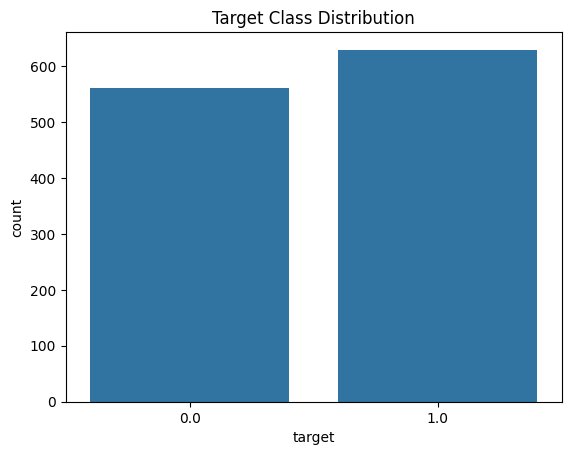

In [10]:

df.info()
df.describe()
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()


In [11]:

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

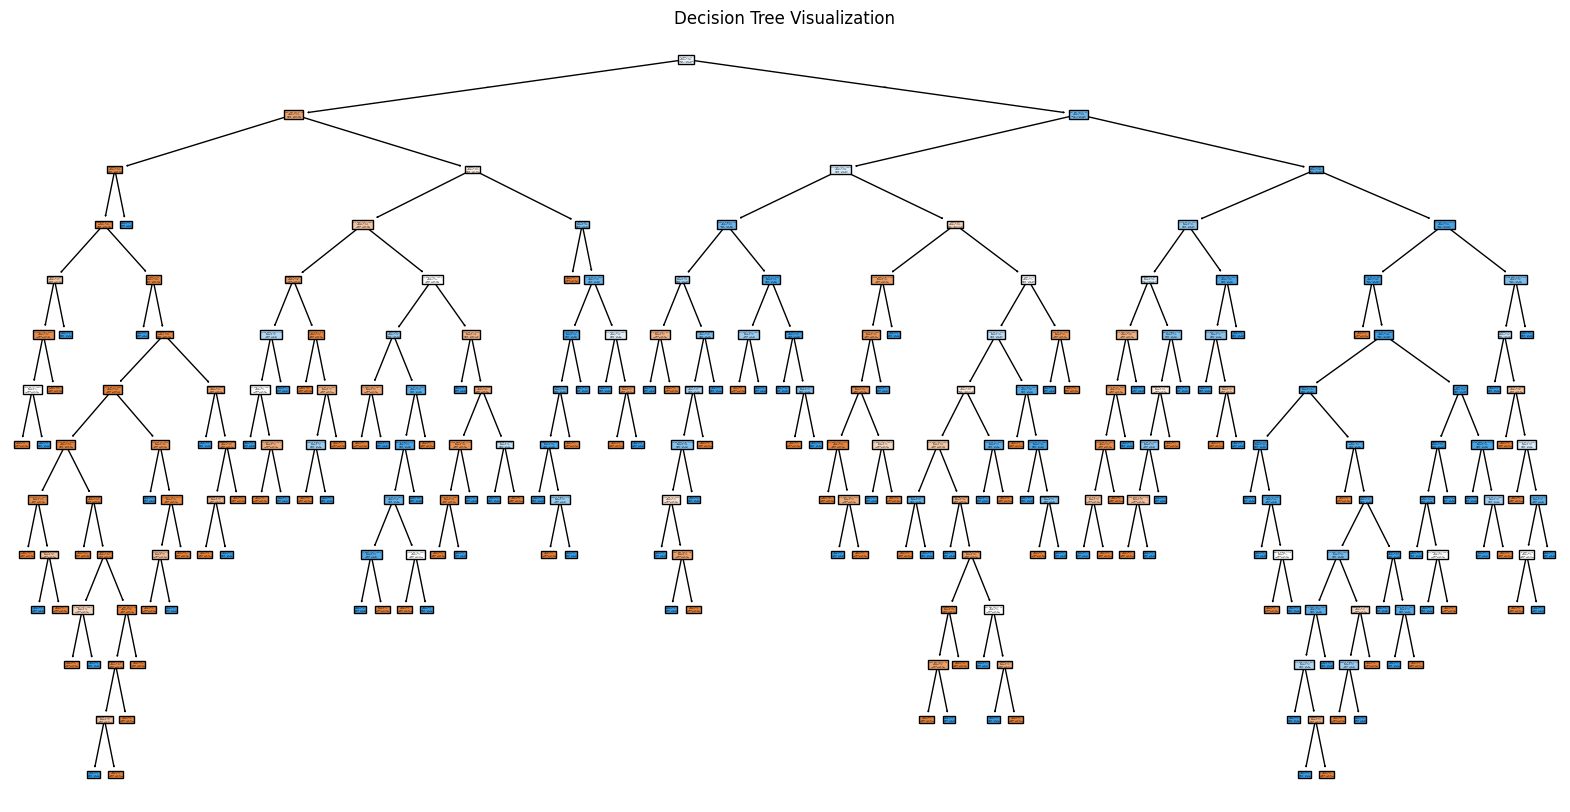

In [13]:

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [14]:

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8949579831932774
[[102   5]
 [ 20 111]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       107
         1.0       0.96      0.85      0.90       131

    accuracy                           0.89       238
   macro avg       0.90      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238



Pruned Tree Accuracy: 0.8487394957983193


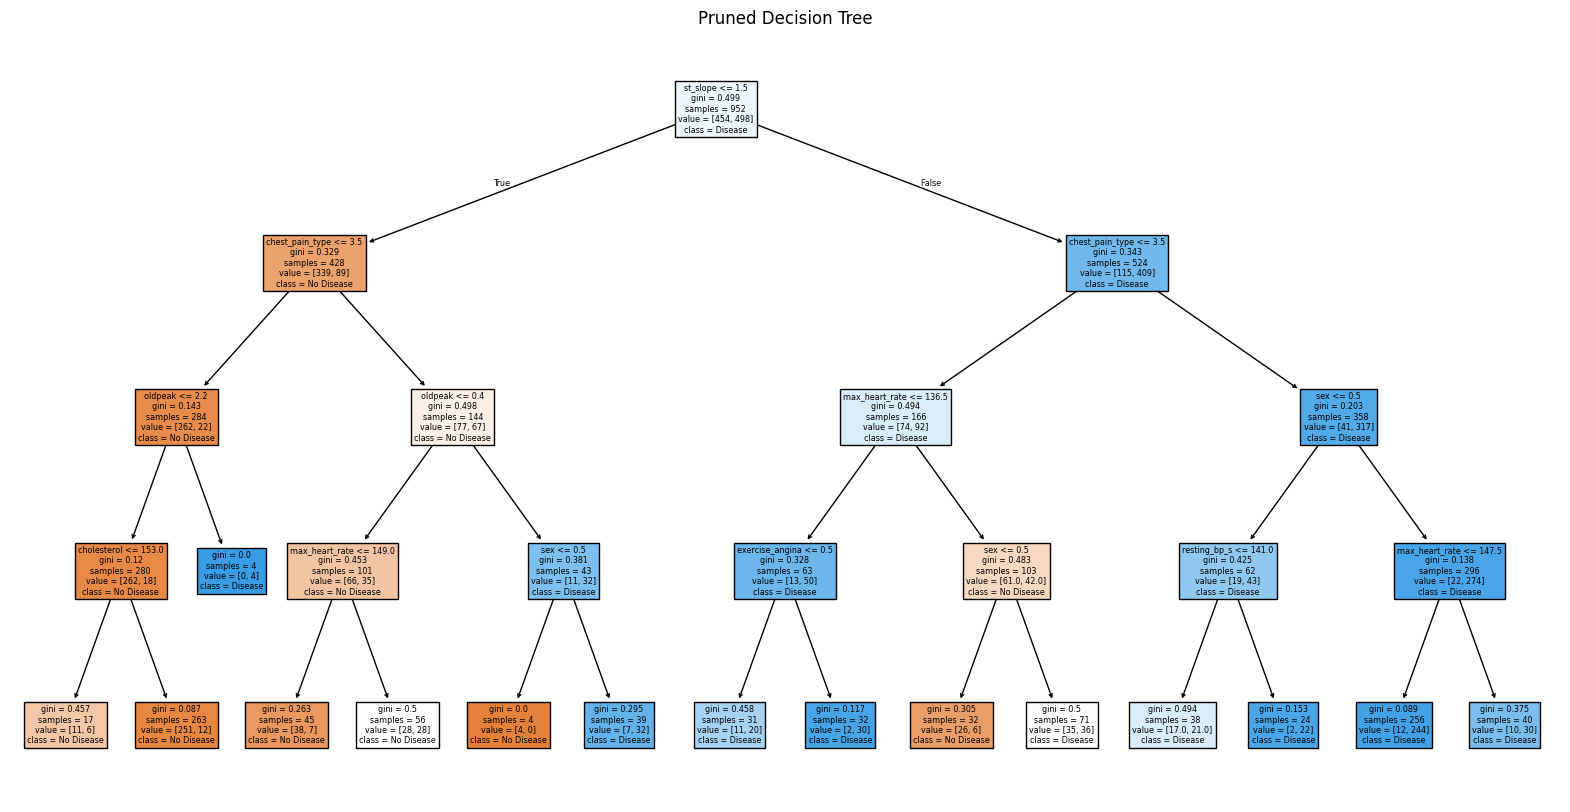

In [15]:

dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Pruned Decision Tree")
plt.show()


In [16]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9537815126050421
[[100   7]
 [  4 127]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       107
         1.0       0.95      0.97      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



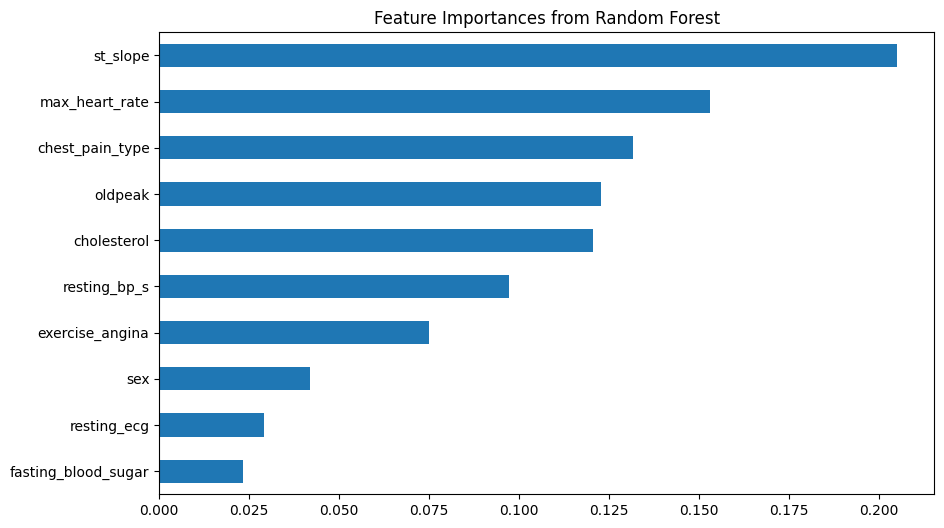

In [17]:

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.show()


In [18]:

cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Decision Tree Cross-Validation Accuracy:", np.mean(cv_scores_dt))
print("Random Forest Cross-Validation Accuracy:", np.mean(cv_scores_rf))


Decision Tree Cross-Validation Accuracy: 0.8731092436974789
Random Forest Cross-Validation Accuracy: 0.9352941176470588
